For Documentary about PyCaret Library Refer: https://pycaret.readthedocs.io/en/latest/api/regression.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pycaret.regression import *
import plotly.express as px

In [2]:
df=pd.read_csv("car data.csv")
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [3]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is BAE7-516A

 Directory of C:\Users\Praveen Bhargav\Desktop\DSE\PyCaret\Car_Price_Pred-master\Praveen CAR PRICE Project

20-04-2021  22:03    <DIR>          .
20-04-2021  22:03    <DIR>          ..
20-04-2021  13:33    <DIR>          .ipynb_checkpoints
20-04-2021  22:03           388,316 2nd hand car price prediction.ipynb
05-04-2021  10:20            16,907 car data.csv
20-04-2021  16:49    <DIR>          catboost_info
20-04-2021  17:26           148,091 logs.log
20-04-2021  17:17           222,021 saved_xgbmodel.pkl
               4 File(s)        775,335 bytes
               4 Dir(s)  171,803,684,864 bytes free


In [8]:
#Feature Engineering

df.isnull().sum()  


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
## No nnull Values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
cat_cols= df.select_dtypes(include= ["object"]).columns.tolist()
print(f"Categorical Columns: {cat_cols}")

Categorical Columns: ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [5]:
num_cols= df.select_dtypes(exclude= ["object"]).columns.tolist()
print(f"Numerical Columns: {num_cols}")

Numerical Columns: ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [6]:
from datetime import date
today_date= date.today()
cur_year= today_date.year
# cur_year
df["Years_Used"]= cur_year-df["Year"]
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Used
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## Exploratoy Data Analysis

In [23]:
#The features/variables which are not helpful for the modeling are "Car_Name, Year" so we can drop those.

In [7]:
top10_best_sales_cars = pd.DataFrame(df.Car_Name.value_counts()[0:10])
top10_best_sales_cars= top10_best_sales_cars.reset_index().rename(columns={"index":"Car_Name", "Car_Name":"No.of_Sales"}).sort_values(by=["No.of_Sales"],ascending= False)
top10_best_sales_cars

,Car_Name,No.of_Sales
0,city,26
1,corolla altis,16
2,verna,14
3,fortuner,11
4,brio,10
5,innova,9
6,i20,9
7,ciaz,9
8,grand i10,8
9,Royal Enfield Classic 350,7


In [10]:
fig=px.bar(top10_best_sales_cars,y="Car_Name", x="No.of_Sales", 
           hover_data=["No.of_Sales"], color="No.of_Sales",
          title= "Top 10 Cars In High Sales",width= 700,
           text="No.of_Sales")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [11]:
#Checking the selling prices of fuel_type cars
print(f'The Maximum Price of Petrol Type\t{df[df["Fuel_Type"]== "Petrol"].Selling_Price.max()}L\nThe Minimum Price of Petrol Type\t{df[df["Fuel_Type"]== "Petrol"].Selling_Price.min()}L')

The Maximum Price of Petrol Type	19.75L
The Minimum Price of Petrol Type	0.1L


In [12]:
#Checking the selling prices of fuel_type cars
print(f'The Maximum Price of Diesel Type\t{df[df["Fuel_Type"]== "Diesel"].Selling_Price.max()}L\nThe Minimum Price of Diesel Type\t{df[df["Fuel_Type"]== "Diesel"].Selling_Price.min()}L')

The Maximum Price of Diesel Type	35.0L
The Minimum Price of Diesel Type	3.1L


In [13]:
#Checking the selling prices of fuel_type cars
print(f'The Maximum Price of CNG Type\t{df[df["Fuel_Type"]== "CNG"].Selling_Price.max()}L\nThe Minimum Price of CNG Type\t{df[df["Fuel_Type"]== "CNG"].Selling_Price.min()}L')

The Maximum Price of CNG Type	3.25L
The Minimum Price of CNG Type	2.95L


In [14]:
list(df["Fuel_Type"].value_counts())

[239, 60, 2]

In [15]:
fig = px.bar(df,  x='Fuel_Type',color="Fuel_Type",title="No. of Fuel_Type cars sold")
fig.show()

In [17]:
high_sales_year= pd.DataFrame(df.Year.value_counts()[0:])
high_sales_year= high_sales_year.reset_index().rename(columns={"index":"Year", "Year":"No.of_Sales"}).sort_values(by=["No.of_Sales"],ascending= False)
high_sales_year

,Year,No.of_Sales
0,2015,61
1,2016,50
2,2014,38
3,2017,35
4,2013,33
5,2012,23
6,2011,19
7,2010,15
8,2008,7
9,2009,6


In [19]:
fig1=px.area(high_sales_year,x="Year", y="No.of_Sales",title="Total No. of Cars Sold Yearly",
             text="No.of_Sales")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# add a graph to the canvas as a trace
fig1.show()

In [20]:
yr_petrol_sales=pd.DataFrame(df[df["Fuel_Type"]=="Petrol"].Year.value_counts())
yr_petrol_sales= yr_petrol_sales.reset_index().rename(columns={"index":"Year", "Year":"No.of_Sales"}).sort_values(by=["No.of_Sales"],ascending= False)
yr_petrol_sales

,Year,No.of_Sales
0,2015,45
1,2016,42
2,2017,31
3,2013,28
4,2014,24
5,2011,17
6,2012,16
7,2010,11
8,2008,7
9,2009,6


In [21]:
yr_diesel_sales=pd.DataFrame(df[df["Fuel_Type"]=="Diesel"].Year.value_counts())
yr_diesel_sales= yr_diesel_sales.reset_index().rename(columns={"index":"Year", "Year":"No.of_Sales"}).sort_values(by=["No.of_Sales"],ascending= False)
yr_diesel_sales

,Year,No.of_Sales
0,2015,15
1,2014,14
2,2016,8
3,2012,7
4,2013,5
5,2010,4
6,2017,4
7,2005,1
8,2011,1
9,2018,1


In [23]:
import plotly.graph_objects as go

# years = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
#          2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

fig = go.Figure()
fig.add_trace(go.Bar(x=yr_petrol_sales["Year"],
                y=yr_petrol_sales["No.of_Sales"],
                name='Petrol_Sales',text="No.of_Sales",
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=yr_diesel_sales["Year"],
                y=yr_diesel_sales["No.of_Sales"],
                name='Diesle_Sales',text=yr_diesel_sales["No.of_Sales"],
                marker_color='rgb(26, 118, 255)'
                ))
fig.update_layout(
    title='Cars Sales Trend Year Wise of Fuel_Types',
    xaxis_tickfont_size=14,
    xaxis= dict(title="Year"),
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

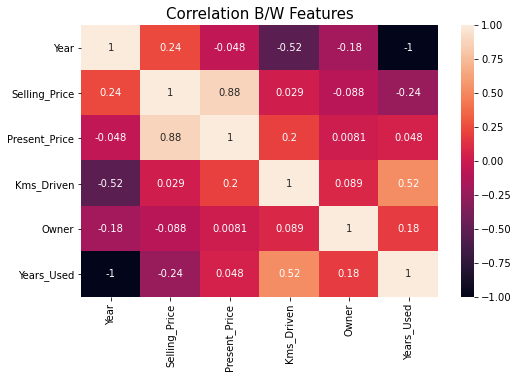

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(8,5))
cmap= df.corr()
sns.heatmap(cmap,annot=True)
plt.title("Correlation B/W Features", fontdict={'fontsize':15})
plt.show()
plt.savefig("Correlation Matrix.jpg")

## Model Building

In [35]:
df.drop(["Car_Name",'Year'],axis=1,inplace=True)
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Years_Used'],
      dtype='object')

In [36]:
df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Used
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8


In [47]:
from pycaret.regression import *
exp1 = setup(df, target = 'Selling_Price',numeric_features=["Years_Used","Owner"])

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6025
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(301, 8)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [216]:
#These are the list of  Regression models used in the PyCaret 
all_models = models()
all_models

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [196]:
best_model=compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,0.6865,1.9020,1.3153,0.9306,0.1337,0.1736,0.0592
1,Gradient Boosting Regressor,0.7266,2.8256,1.5120,0.9080,0.1327,0.1860,0.0502
2,Random Forest,0.7131,2.8812,1.5461,0.9028,0.1317,0.1683,0.2095
3,CatBoost Regressor,0.6752,3.7797,1.5884,0.8963,0.1464,0.2252,1.8831
4,Extra Trees Regressor,0.6823,3.9320,1.7016,0.8821,0.1348,0.1570,0.1516
5,Decision Tree,0.8662,4.1429,1.8125,0.8557,0.1706,0.2117,0.0031
6,AdaBoost Regressor,1.0878,4.1776,1.8882,0.8547,0.2529,0.6101,0.0911
7,TheilSen Regressor,1.2042,4.3291,2.0275,0.8313,0.3122,1.0121,1.0631
8,Bayesian Ridge,1.2922,5.1887,2.1853,0.8099,0.3716,1.1771,0.0098
9,Ridge Regression,1.2952,5.0854,2.1754,0.8085,0.3738,1.1872,0.0068


ID of an estimator available in model library or pass an untrained model object consistent with scikit-learn API. Estimators available in the model library (ID - Name):

‘lr’ - Linear Regression

‘lasso’ - Lasso Regression

‘ridge’ - Ridge Regression

‘en’ - Elastic Net

‘lar’ - Least Angle Regression

‘llar’ - Lasso Least Angle Regression

‘omp’ - Orthogonal Matching Pursuit

‘br’ - Bayesian Ridge

‘ard’ - Automatic Relevance Determination

‘par’ - Passive Aggressive Regressor

‘ransac’ - Random Sample Consensus

‘tr’ - TheilSen Regressor

‘huber’ - Huber Regressor

‘kr’ - Kernel Ridge

‘svm’ - Support Vector Regression

‘knn’ - K Neighbors Regressor

‘dt’ - Decision Tree Regressor

‘rf’ - Random Forest Regressor

‘et’ - Extra Trees Regressor

‘ada’ - AdaBoost Regressor

‘gbr’ - Gradient Boosting Regressor

‘mlp’ - MLP Regressor

‘xgboost’ - Extreme Gradient Boosting

‘lightgbm’ - Light Gradient Boosting Machine

‘catboost’ - CatBoost Regressor

In [48]:
xgb=create_model("xgboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8810,3.9653,1.9913,0.9146,0.1473,0.2036
1,0.9250,2.2244,1.4915,0.9616,0.1439,0.1733
2,0.5950,1.1453,1.0702,0.8968,0.1338,0.2155
3,0.8831,2.5082,1.5837,0.8887,0.1828,0.2992
4,0.5360,0.7178,0.8473,0.9444,0.1127,0.1144
5,0.5005,0.5461,0.7390,0.9726,0.1014,0.1486
6,0.5138,1.0893,1.0437,0.9590,0.1416,0.1355
7,0.3108,0.2457,0.4957,0.9766,0.0773,0.1264
8,0.5681,0.8123,0.9013,0.9080,0.1209,0.1790
9,0.5301,0.7562,0.8696,0.9751,0.1249,0.1226


In [49]:
X_train = get_config('X_train')
X_train

,Present_Price,Kms_Driven,Owner,Years_Used,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
28,3.95,44542.0,0.0,11.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
200,0.75,92233.0,0.0,15.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
70,6.76,71000.0,0.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
277,13.60,21780.0,0.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
89,6.76,40000.0,0.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
273,7.50,61203.0,0.0,11.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
33,9.95,45000.0,0.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
242,7.13,34000.0,0.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
184,0.75,26000.0,1.0,13.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [198]:
tuned_xgb = tune_model(xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0497,3.6919,1.9214,0.8922,0.4395,1.3010
1,0.9043,1.5760,1.2554,0.9592,0.2327,0.3098
2,1.3731,5.8649,2.4218,0.8955,0.2709,0.6094
3,1.0056,1.6304,1.2769,0.9424,0.3188,1.2122
4,0.8347,1.2429,1.1148,0.9353,0.2433,0.4137
5,1.3214,3.8451,1.9609,0.7630,0.4118,1.4442
6,0.9194,1.4484,1.2035,0.8335,0.3558,1.6202
7,0.7418,1.3260,1.1515,0.7678,0.1943,0.3757
8,1.9429,10.3254,3.2133,0.8328,0.6482,2.8205
9,1.3025,4.7603,2.1818,0.6949,0.3056,0.4474


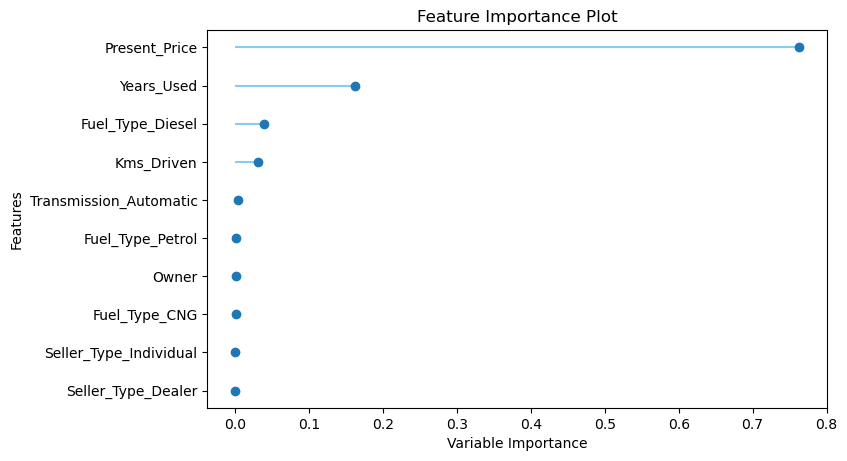

In [200]:
plot_model(xgb, plot = 'feature')

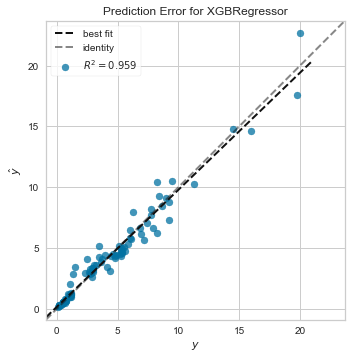

In [203]:
plot_model(xgb, plot = 'error')

In [204]:
evaluate_model(xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [50]:
pred=predict_model(xgb)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,0.6548,1.1891,1.0905,0.9549,0.1415,0.1777


In [51]:
pred

,Present_Price,Kms_Driven,Owner,Years_Used,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Selling_Price,Label
0,0.840,5000.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.78,0.6145
1,6.100,31427.0,0.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5.40,4.6821
2,7.600,17000.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5.25,6.5225
3,35.960,47000.0,0.0,6.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,23.50,19.9772
4,1.170,6000.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.05,0.7222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.950,1300.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.90,0.7272
87,9.400,36100.0,0.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.50,4.9477
88,0.787,15000.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.55,0.6453
89,9.400,36000.0,0.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.50,4.9477


In [210]:
predict=predict_model(xgb,data=df)

In [211]:
predict

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Used,Label
index,,,,,,,,,
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7,3.3616
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8,4.7545
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4,7.2552
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10,2.8464
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7,4.4825
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5,10.5271
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6,4.0032
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12,3.3505


In [213]:
#Finalizing the model
final_xgb = finalize_model(xgb)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=7605, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0), ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metr

In [214]:
save_model(final_xgb, 'saved_xgbmodel')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=7605, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0), model_name=saved_xgbmodel, model_only=False, verbose=True)
INFO:logs:saved_xgbmodel.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop

Transformation Pipeline and Model Succesfully Saved


### END

### Testing on the sample input record

In [37]:
xgb= load_model("saved_xgbmodel")

Transformation Pipeline and Model Successfully Loaded


In [62]:
Present_Price = 12.3
Kms_Driven= 45000
Owner= 0.0
Years_Used= 7.0
Fuel_Type_CNG=0.0
Fuel_Type_Diesel= 0.0
Fuel_Type_Petrol= 1.0
Seller_Type_Dealer= 0.0
Seller_Type_Individual= 1.0
Transmission_Automatic= 0.0
Transmission_Manual= 1.0

In [64]:
predict_model(xgb,data= [[Present_Price,Kms_Driven,Owner,Years_Used,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual]])

AttributeError: 'list' object has no attribute 'reset_index'

In [59]:
dff= pd.DataFrame({"Present_Price":12.5,"Kms_Driven":45000,"Fuel_Type":"Petrol","Seller_Type":"Dealer","Transmission":"Manual","Owner":0,"Years_Used":8}, index= np.arange(1))
# Present_Price	Kms_Driven	Fuel_Type	Seller_Type	Transmission	Owner	Years_Used
dff

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Used
0,12.5,45000,Petrol,Dealer,Manual,0,8


In [60]:
pred= predict_model(xgb,data=dff)

In [61]:
pred

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Used,Label
index,,,,,,,,
0,12.5,45000,Petrol,Dealer,Manual,0,8,5.2475
